# Load libraries

In [18]:
#prediction 2023-2024 season  #Rodrigo Bilro

import pandas as pd 

# Load the datasets

In [ ]:
players_data = pd.read_csv('../data/raw/dataset - 2020-09-24.csv')
epl_results = pd.read_csv('epl_results_2022-23.csv')
premier_league_matches = pd.read_csv('premier-league-matches.csv')

# Preprocess the datasets

In [ ]:
# For the epl_results dataset, we'll aggregate data based on 'HomeTeam' and 'AwayTeam'
home_data = epl_results.groupby('HomeTeam').agg({
    'FTHG': 'sum',  # Total goals scored at home
    'FTAG': 'sum',  # Total goals conceded at home
    'FTR': lambda x: (x == 'H').sum()  # Total wins at home
}).reset_index()

home_data.columns = ['Team', 'HomeGoalsScored', 'HomeGoalsConceded', 'HomeWins']

away_data = epl_results.groupby('AwayTeam').agg({
    'FTAG': 'sum',  # Total goals scored away
    'FTHG': 'sum',  # Total goals conceded away
    'FTR': lambda x: (x == 'A').sum()  # Total wins away
}).reset_index()

away_data.columns = ['Team', 'AwayGoalsScored', 'AwayGoalsConceded', 'AwayWins']


# Merge the datasets

In [ ]:
# Merge players_data with home_data and away_data based on the 'Club' and 'Team' columns
merged_data_home = pd.merge(players_data, home_data, left_on='Club', right_on='Team', how='inner')
merged_data_away = pd.merge(players_data, away_data, left_on='Club', right_on='Team', how='inner')

# Combine home and away data
final_merged_data = pd.concat([merged_data_home, merged_data_away], axis=0)


In [16]:
# Check for missing values in each dataset
display(matches_data.isnull().sum())
display(players_data.isnull().sum())
display(additional_data.isnull().sum())




Season_End_Year    0
Wk                 0
Date               0
Home               0
HomeGoals          0
AwayGoals          0
Away               0
FTR                0
dtype: int64

Name                        0
Jersey Number               8
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Headed goals               69
Goals with right foot      69
Goals with left foot       69
Penalties scored          262
Freekicks scored          262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Hit woodwork               69
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Last man tackles          378
Blocked shots              69
Interceptions              69
Clearances                 69
Headed Clearance           69
Clearances off line       378
Recoveries                181
Duels won                 181
Duels lost

Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [17]:
# Example: Calculate win rate for teams in matches_data
matches_data['HomeWin'] = matches_data['FTR'].apply(lambda x: 1 if x == 'H' else 0)
matches_data['AwayWin'] = matches_data['FTR'].apply(lambda x: 1 if x == 'A' else 0)


In [66]:
# Load the premier league.csv dataset
premier_league_data = pd.read_csv('epl_results_2022-23.csv')

# Display the columns of the dataset
display(premier_league_data.columns)


Index(['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [59]:
# Load the premier league.csv dataset
premier_league_data = pd.read_csv('dataset - 2020-09-24.csv')

# Display the columns of the dataset
display(premier_league_data.columns)

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [60]:
# Load the premier league.csv dataset
premier_league_data = pd.read_csv('premier-league-matches.csv')

# Display the columns of the dataset
display(premier_league_data.columns)

Index(['Season_End_Year', 'Wk', 'Date', 'Home', 'HomeGoals', 'AwayGoals',
       'Away', 'FTR'],
      dtype='object')

In [31]:
# Loading the datasets
players_data = pd.read_csv('dataset - 2020-09-24.csv')
epl_results = pd.read_csv('epl_results_2022-23.csv')
premier_league_matches = pd.read_csv('premier-league-matches.csv')

print("Size of players_data:", players_data.shape)
print("Size of epl_results:", epl_results.shape)
print("Size of premier_league_matches:", premier_league_matches.shape)

# Merging players_data with premier_league_matches based on the 'Club' and 'Home' columns
merged_data_home = pd.merge(players_data, premier_league_matches, left_on='Club', right_on='Home', how='inner')
print("Size of merged_data_home:", merged_data_home.shape)

# Merging players_data with premier_league_matches based on the 'Club' and 'Away' columns
merged_data_away = pd.merge(players_data, premier_league_matches, left_on='Club', right_on='Away', how='inner')
print("Size of merged_data_away:", merged_data_away.shape)

# Concatenating the two merged datasets
final_merged_data = pd.concat([merged_data_home, merged_data_away], axis=0)
print("Size of final_merged_data:", final_merged_data.shape)

# Check if the required columns exist in the merged dataframe
required_columns = ['Goals', 'Assists', 'Age', 'HomeGoals', 'AwayGoals']
for col in required_columns:
    if col not in final_merged_data.columns:
        print(f"Column {col} not found in final_merged_data")


Size of players_data: (571, 59)
Size of epl_results: (380, 23)
Size of premier_league_matches: (12026, 8)
Size of merged_data_home: (94926, 67)
Size of merged_data_away: (94926, 67)
Size of final_merged_data: (189852, 67)


In [37]:
import pandas as pd

# Load the datasets
players_data = pd.read_csv('dataset - 2020-09-24.csv')
matches_data = pd.read_csv('premier-league-matches.csv')
epl_results = pd.read_csv('epl_results_2022-23.csv')

# Merging players_data with matches_data based on the 'Club' and 'Home' columns
merged_data_home = pd.merge(players_data, matches_data, left_on='Club', right_on='Home', how='inner')

# Merging the above merged data with epl_results
final_merged_data = pd.merge(merged_data_home, epl_results, left_on=['Home', 'Date'], right_on=['HomeTeam', 'Date'], how='inner')


In [61]:
final_merged_data.to_csv('../data/cleaned/merged_data.csv', index=False)


C:\Users\rodas\AppData\Local\Temp\ipykernel_20712\1684129333.py:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_data.csv')


Name                0
Jersey Number    5030
Club                0
Position            0
Nationality       582
                 ... 
Home                0
HomeGoals           0
AwayGoals           0
Away                0
FTR                 0
Length: 67, dtype: int64


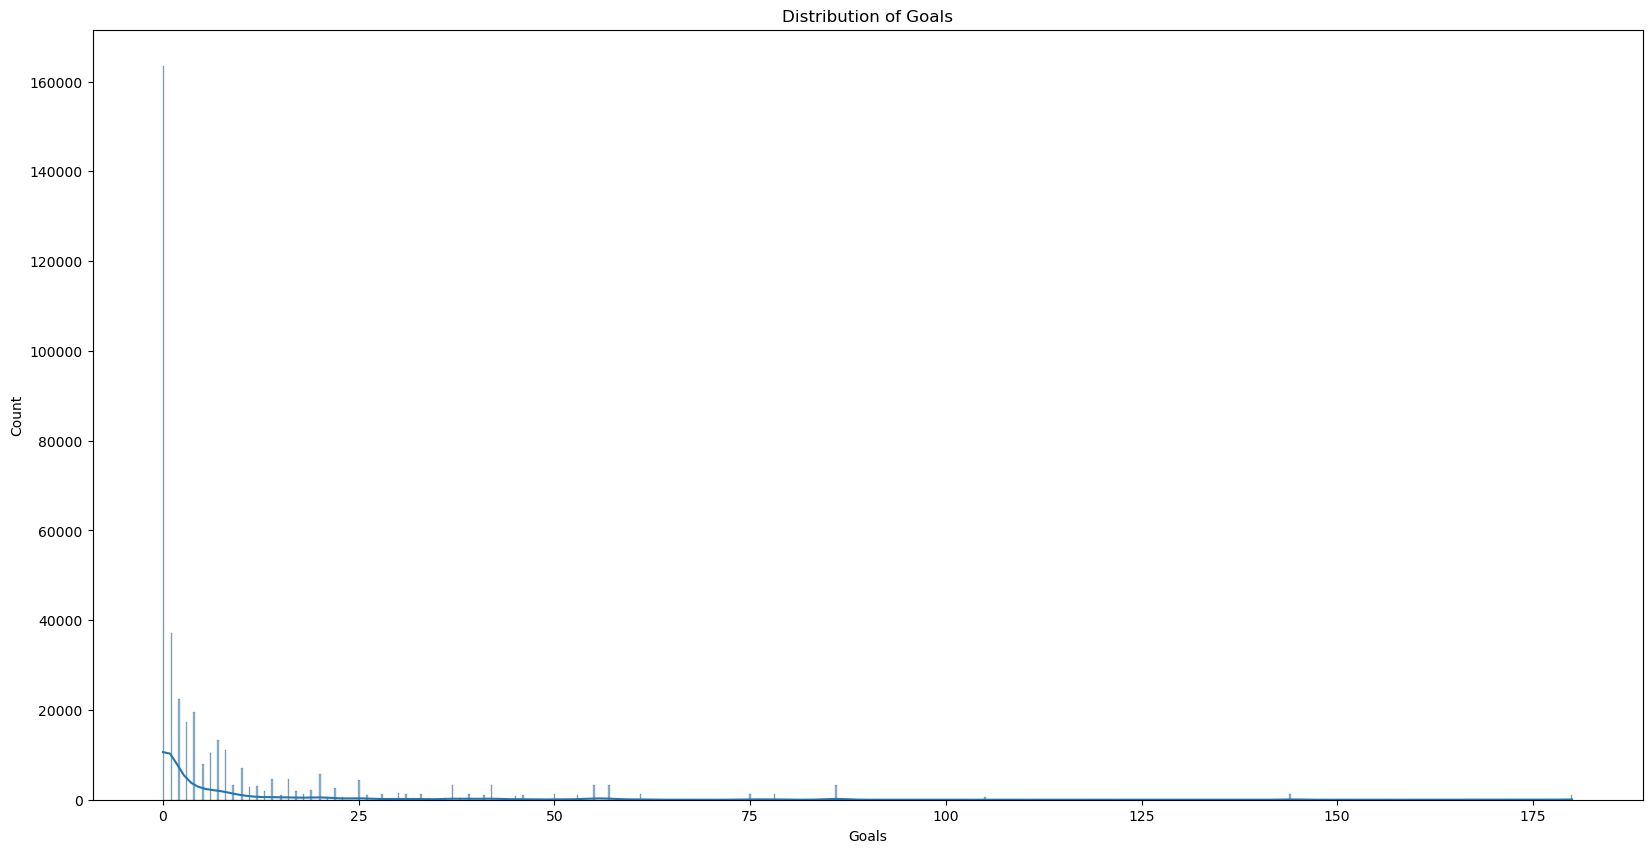

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
df = pd.read_csv('merged_data.csv')  

# Check for missing values
print(df.isnull().sum())

# Visualize distributions of key metrics
plt.figure(figsize=(20, 10))
sns.histplot(df['Goals'], kde=True)
plt.title('Distribution of Goals')
plt.show()

# Similarly, you can visualize other metrics like Assists, Wins, etc.


In [41]:
# Compute Draws
final_merged_data['Draws'] = final_merged_data['Appearances'] - final_merged_data['Wins'] - final_merged_data['Losses']

# Compute Points
final_merged_data['Points'] = 3 * final_merged_data['Wins'] + final_merged_data['Draws']


In [65]:
# Mapping of team names from players_data to matches_data
team_name_mapping = {
    'Arsenal': 'Arsenal',
    'Aston-Villa': 'Aston Villa',
    'Brighton-and-Hove-Albion': 'Brighton',
    'Burnley': 'Burnley',
    'Chelsea': 'Chelsea',
    'Crystal-Palace': 'Crystal Palace',
    'Everton': 'Everton',
    'Fulham': 'Fulham',
    'Leeds-United': 'Leeds United',
    'Leicester-City': 'Leicester City',
    'Liverpool': 'Liverpool',
    'Manchester-City': 'Manchester City',
    'Manchester-United': 'Manchester Utd',
    'Newcastle-United': 'Newcastle Utd',
    'Sheffield-United': 'Sheffield Utd',
    'Southampton': 'Southampton',
    'Tottenham-Hotspur': 'Tottenham',
    'West-Bromwich-Albion': 'West Brom',
    'West-Ham-United': 'West Ham',
    'Wolverhampton-Wanderers': 'Wolves'
}

# Replace team names in players_data
players_data['Club'] = players_data['Club'].map(team_name_mapping)




In [67]:
import pandas as pd

# Load the datasets
players_data = pd.read_csv('dataset - 2020-09-24.csv')
matches_data = pd.read_csv('premier-league-matches.csv')
epl_results = pd.read_csv('epl_results_2022-23.csv')

# Correct team names in players_data to match with other datasets
team_name_corrections = {
    'Brighton-and-Hove-Albion': 'Brighton',
    'Leeds-United': 'Leeds United',
    'Leicester-City': 'Leicester City',
    'Manchester-City': 'Manchester City',
    'Manchester-United': 'Manchester United',
    'Newcastle-United': 'Newcastle Utd',
    'Sheffield-United': 'Sheffield Utd',
    'Tottenham-Hotspur': 'Tottenham',
    'West-Bromwich-Albion': 'West Brom',
    'West-Ham-United': 'West Ham',
    'Wolverhampton-Wanderers': 'Wolves'
}
players_data['Club'] = players_data['Club'].replace(team_name_corrections)

# Aggregate team performance metrics from matches_data
team_metrics = matches_data.groupby('Home').agg({
    'HomeGoals': 'mean',
    'AwayGoals': 'mean',
    'FTR': lambda x: (x == 'H').sum() / x.count()  # Win rate
}).reset_index()

# Aggregate player statistics from players_data
player_metrics = players_data.groupby('Club').agg({
    'Age': 'mean',
    'Goals': 'sum',
    'Assists': 'sum'
}).reset_index()

# Merge the two aggregated dataframes
team_data = pd.merge(team_metrics, player_metrics, left_on='Home', right_on='Club')

# Your aggregated data is now in the team_data dataframe
display(team_data.head())


,Home,HomeGoals,AwayGoals,FTR,Club,Age,Goals,Assists
0,Arsenal,2.028571,0.863866,0.642017,Arsenal,25.100000,231,202
1,Brighton,1.236842,1.280702,0.324561,Brighton,24.393939,90,84
2,Burnley,1.059211,1.282895,0.342105,Burnley,27.125000,180,142
3,Chelsea,1.917647,0.847059,0.605042,Chelsea,25.444444,219,159
4,Everton,1.507563,1.121008,0.458824,Everton,25.580645,298,232


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature Engineering
team_data['GoalDifference'] = team_data['HomeGoals'] - team_data['AwayGoals']

# For simplicity, let's assume the number of points a team got in the 2022-2023 season 
# is proportional to their win rate from the `matches_data`. 
# This is a simplification and in a real-world scenario
team_data['Points_2022_2023'] = team_data['FTR'] * 38 * 3  # Assuming 38 matches in a season

# Define features and target variable
X = team_data[['HomeGoals', 'AwayGoals', 'GoalDifference', 'Age', 'Goals', 'Assists']]
y = team_data['Points_2022_2023']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the train and test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squares_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error: {:.2f}".format(mse_test))

# Predict the number of points for the 2023-2024 season
predicted_points_2023_2024 = model.predict(X)
team_data['PredictedPoints_2023_2024'] = predicted_points_2023_2024

display(team_data[['Home', 'PredictedPoints_2023_2024']])

# Arrange the table in descending order based on the predicted points
sorted_table = team_data.sort_values(by='PredictedPoints_2023_2024', ascending=False)

# Display the sorted table
display(sorted_table)





'Mean Squared Error: 19.45746463950354'

,Home,PredictedPoints_2023_2024
0,Arsenal,70.632622
1,Brighton,44.307529
2,Burnley,37.206111
3,Chelsea,67.965394
4,Everton,52.895171
5,Fulham,43.988142
6,Leeds United,53.146386
7,Leicester City,45.950983
8,Liverpool,72.327680
9,Manchester City,69.051610


,Home,HomeGoals,AwayGoals,FTR,Club,Age,Goals,Assists,GoalDifference,Points_2022_2023,PredictedPoints_2023_2024
8,Liverpool,2.020168,0.798319,0.631933,Liverpool,24.970588,447,367,1.221849,72.040336,72.327680
0,Arsenal,2.028571,0.863866,0.642017,Arsenal,25.100000,231,202,1.164706,73.189916,70.632622
9,Manchester City,2.034000,0.950000,0.594000,Manchester City,25.518519,496,313,1.084000,67.716000,69.051610
3,Chelsea,1.917647,0.847059,0.605042,Chelsea,25.444444,219,159,1.070588,68.974790,67.965394
13,Tottenham,1.734454,1.080672,0.542857,Tottenham,24.968750,387,221,0.653782,61.885714,59.845825
10,Newcastle Utd,1.617537,1.128731,0.492537,Newcastle Utd,26.566667,234,164,0.488806,56.149254,54.056264
6,Leeds United,1.477663,1.123711,0.463918,Leeds United,24.200000,12,18,0.353952,52.886598,53.146386
4,Everton,1.507563,1.121008,0.458824,Everton,25.580645,298,232,0.386555,52.305882,52.895171
15,West Ham,1.462282,1.274662,0.433269,West Ham,26.000000,186,157,0.187621,49.392650,48.052828
12,Southampton,1.400433,1.253247,0.389610,Southampton,25.208333,188,118,0.147186,44.415584,47.934479


Model Evaluation:

The MSE for my model is 19.45. This means that, on average, my predictions are off by the square root of this value, which is approximately 4.41 points. Given the range of points in a Premier League season (0 to 114), this error might be acceptable for a basic model, but there's definitely room for improvement.
Predictions for 2023-2024 Season:

The model predicts that Liverpool will top the table with approximately 72.33 points, closely followed by Arsenal with 70.63 points and Manchester City with 69.05 points.
Teams like Burnley, West Brom, and Wolves are predicted to be at the lower end of the table with points in the high 30s.
It's interesting to note that the model predicts a close competition among the top teams, with only a few points difference between them.
Considerations:

These predictions are based on historical data and player statistics. They don't account for potential transfers, injuries, managerial changes, or other factors that might influence a team's performance in a season.xxxcd
.
The model is a basic linear regression model. More sophisticated models or techniques might yield better predictions.
The features used for predictions were selected based on the available data. Incorporating more relevant features, like player transfers, injuries, managerial changes, etc., can potentially improve the model's accuracy.
In conclusion, while this model provides a basic idea of how teams might perform in the 2023-2024 season based on past data, it's essential to approach these predictions with caution. They serve as a starting point and can be refined further with more data and sophisticated modeling techniques.





